In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In machine learning and statistical problems, we have a set of known data $D$, unknown data $X$, and often model parameters $\theta$. <br>
$D$ and $X$ often come in the form of input and output data, but for simple cases, they are just a set of events.
Ideally, we would know $p(X|D)$. In some cases, as demonstrated in notebook 1, you can integrate out $\theta$ to get this probability. In other cases there is no $\theta$ that is learned. These are called non-parameteric models. These models are often computationally intractable for large datasets. <br>

An example of a non-parameteric model is the K-nearest neighbours algorithm. $K$ is a hyper-parameter, and the probability of the data belonging to a class is given: $$p(y=c|x,D,K)=\frac{1}{K}\sum_{i\epsilon N_K} \textbf{1}(y_i=c)$$
Where $N_K$ is the index of the closest K points to x, and $\textbf{1}$ is the indicator function <br>
**A KNN example:**

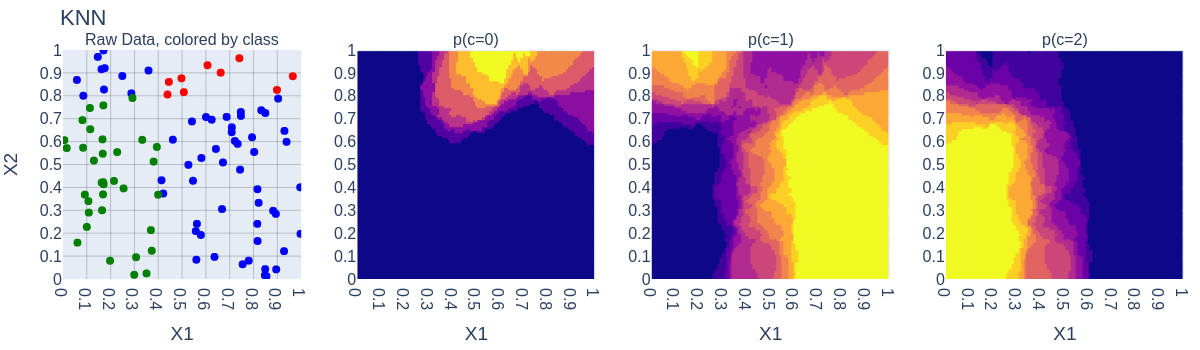

In [2]:
K = 10
number_of_training_points = 100

X1_train = np.random.rand(number_of_training_points)
X2_train = np.random.rand(number_of_training_points)

class_train = (X1_train<0.4)*1+(X2_train<0.8)*1 # fake data

X1_test, X2_test = np.mgrid[0:1:0.01,0:1:0.01]

X1_test = X1_test.reshape(-1)
X2_test = X2_test.reshape(-1)

sq_distances = np.zeros((len(X1_test),number_of_training_points))
for i in range(number_of_training_points):
    sq_distances[:,i] = (X1_test-X1_train[i])**2+(X2_test-X2_train[i])**2
sorted_indexes = np.argsort(sq_distances,axis=1)
closest_K_indexes = sorted_indexes[:,:K]
closest_K_classes = class_train[closest_K_indexes]

class0_prob = np.sum(closest_K_classes==0,axis=1)/K
class1_prob = np.sum(closest_K_classes==1,axis=1)/K
class2_prob = np.sum(closest_K_classes==2,axis=1)/K

fig = make_subplots(rows=1,cols=4,subplot_titles=("Raw Data, colored by class", "p(c=0)", "p(c=1)", "p(c=2)"))
scatter_trace1 = go.Scatter(x=X1_train[class_train==0],y=X2_train[class_train==0],mode="markers",marker=dict(color="red",size=8))
scatter_trace2 = go.Scatter(x=X1_train[class_train==1],y=X2_train[class_train==1],mode="markers",marker=dict(color="blue",size=8))
scatter_trace3 = go.Scatter(x=X1_train[class_train==2],y=X2_train[class_train==2],mode="markers",marker=dict(color="green",size=8))

heatmap_prob_class0_trace = go.Heatmap(z=class0_prob.reshape(100,100,order="F"),showscale=False)
heatmap_prob_class1_trace = go.Heatmap(z=class1_prob.reshape(100,100,order="F"),showscale=False)
heatmap_prob_class2_trace = go.Heatmap(z=class2_prob.reshape(100,100,order="F"),showscale=False)

fig.add_trace(scatter_trace1,row=1,col=1)
fig.add_trace(scatter_trace2,row=1,col=1)
fig.add_trace(scatter_trace3,row=1,col=1)
fig.add_trace(heatmap_prob_class0_trace,row=1,col=2)
fig.add_trace(heatmap_prob_class1_trace,row=1,col=3)
fig.add_trace(heatmap_prob_class2_trace,row=1,col=4)

fig.update_layout(margin=dict(t=50,l=10,b=10,r=10),showlegend=False,title="KNN",font=dict(size=16))
fig.update_xaxes(range=[0,1],title_text="X1", nticks=20,gridcolor="rgba(0,0,0,0.2)",zeroline=False, row=1, col=1)
fig.update_yaxes(range=[0,1],title_text="X2",nticks=20,gridcolor="rgba(0,0,0,0.2)", zeroline=False,row=1, col=1)
fig.update_xaxes(range=[0,100],title_text="X1",tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=2)
fig.update_yaxes(range=[0,100],tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=2)
fig.update_xaxes(range=[0,100],title_text="X1",tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=3)
fig.update_yaxes(range=[0,100],tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=3)
fig.update_xaxes(range=[0,100],title_text="X1",tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=4)
fig.update_yaxes(range=[0,100],tickmode="array",tickvals=np.arange(11)*10,ticktext=np.linspace(0,1,11).round(1),row=1, col=4)

fig.show(renderer="png",width=1200,height=350)

The first diagram on the left shows some data, the next 3 images show the probabilities of each class calculated using the KNN rule.